In [75]:
#importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [76]:
#loading the dataset
df = pd.read_csv('rfm_data.csv')
df

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location
0,8814,2023-04-11,943.31,Product C,890075,Tokyo
1,2188,2023-04-11,463.70,Product A,176819,London
2,4608,2023-04-11,80.28,Product A,340062,New York
3,2559,2023-04-11,221.29,Product A,239145,London
4,9482,2023-04-11,739.56,Product A,194545,Paris
...,...,...,...,...,...,...
995,2970,2023-06-10,759.62,Product B,275284,London
996,6669,2023-06-10,941.50,Product C,987025,New York
997,8836,2023-06-10,545.36,Product C,512842,London
998,1440,2023-06-10,729.94,Product B,559753,Paris


In [77]:
#getting information about the dataframe
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CustomerID          1000 non-null   int64  
 1   PurchaseDate        1000 non-null   object 
 2   TransactionAmount   1000 non-null   float64
 3   ProductInformation  1000 non-null   object 
 4   OrderID             1000 non-null   int64  
 5   Location            1000 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 215.0 KB


In [78]:
#describing the dataframe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,1000.0,5554.78900,2605.014863,1011.00,3273.00,5538.000,7821.75,9991.00
TransactionAmount,1000.0,513.67781,286.098700,12.13,257.12,523.565,759.86,999.44
OrderID,1000.0,554071.39800,264695.448814,100096.00,313152.00,564671.500,783052.25,999695.00


In [79]:
#analyzing the dataframe to see the different locations in the dataset
df['Location'].unique()

array(['Tokyo', 'London', 'New York', 'Paris'], dtype=object)

In [80]:
#analyzing to see the different products
df['ProductInformation'].unique()

array(['Product C', 'Product A', 'Product B', 'Product D'], dtype=object)

In [81]:
#analyzing to see how many customers
df['CustomerID'].nunique()

946

In [82]:
#converting Purchase Date to datetime
df['PurchaseDate'] = pd.to_datetime(df['PurchaseDate'])

In [83]:
#calculating  customer recency
recency = df.groupby('CustomerID')['PurchaseDate'].max().reset_index()
recency['recency'] = recency['PurchaseDate'].max() - recency['PurchaseDate']
recency.head()

,CustomerID,PurchaseDate,recency
0,1011,2023-05-08,33 days
1,1025,2023-05-20,21 days
2,1029,2023-06-10,0 days
3,1046,2023-04-28,43 days
4,1049,2023-05-28,13 days


In [84]:
#calculating customer frequency
frequency = df.drop_duplicates().groupby('CustomerID').size().reset_index(name='Frequency')
frequency.columns = ['CustomerID', 'Frequency']
frequency

,CustomerID,Frequency
0,1011,2
1,1025,1
2,1029,1
3,1046,1
4,1049,1
...,...,...
941,9941,1
942,9950,1
943,9954,1
944,9985,1


In [85]:
#calculating monetary value
monetary = df.groupby('CustomerID')['TransactionAmount'].sum().reset_index()
monetary.columns = ['CustomerID', 'monetary']
monetary.head()

,CustomerID,monetary
0,1011,1129.02
1,1025,359.29
2,1029,704.99
3,1046,859.82
4,1049,225.72


In [86]:
#merging recency, frequency and monetary into one column
rfm = recency.merge(frequency, on='CustomerID', how='left')
rfm_df = rfm.merge(monetary, on='CustomerID', how='left').drop(columns='PurchaseDate')
rfm_df

,CustomerID,recency,Frequency,monetary
0,1011,33 days,2,1129.02
1,1025,21 days,1,359.29
2,1029,0 days,1,704.99
3,1046,43 days,1,859.82
4,1049,13 days,1,225.72
...,...,...,...,...
941,9941,42 days,1,960.53
942,9950,38 days,1,679.11
943,9954,12 days,1,798.01
944,9985,57 days,1,36.10


In [87]:
#sorting the dataframe by calculating ranks and normalizing them
rfm_df['R_rank'] = rfm_df['recency'].rank(ascending=False)
rfm_df['F_rank'] = rfm_df['Frequency'].rank(ascending=True)
rfm_df['M_rank'] = rfm_df['monetary'].rank(ascending=True)
 
# normalizing the rank of the customers
rfm_df['R_rank_norm'] = (rfm_df['R_rank']/rfm_df['R_rank'].max())*100
rfm_df['F_rank_norm'] = (rfm_df['F_rank']/rfm_df['F_rank'].max())*100
rfm_df['M_rank_norm'] = (rfm_df['F_rank']/rfm_df['M_rank'].max())*100
 
rfm_df.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)
 
rfm_df.head()

,CustomerID,recency,Frequency,monetary,R_rank_norm,F_rank_norm,M_rank_norm
0,1011,33 days,2,1129.02,47.331910,97.301587,97.198732
1,1025,21 days,1,359.29,64.727855,47.407407,47.357294
2,1029,0 days,1,704.99,100.000000,47.407407,47.357294
3,1046,43 days,1,859.82,27.908218,47.407407,47.357294
4,1049,13 days,1,225.72,78.762006,47.407407,47.357294


In [88]:
#calculating the RFM score
rfm_df['RFM_Score'] = 0.15*rfm_df['R_rank_norm']+0.28 * rfm_df['F_rank_norm']+0.57*rfm_df['M_rank_norm']

rfm_df['RFM_Score'] *= 0.1
#rounding the score
rfm_df = rfm_df.round(2)

rfm_df.head(10)


,CustomerID,recency,Frequency,monetary,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score
0,1011,33 days,2,1129.02,47.33,97.30,97.20,8.97
1,1025,21 days,1,359.29,64.73,47.41,47.36,5.00
2,1029,0 days,1,704.99,100.00,47.41,47.36,5.53
3,1046,43 days,1,859.82,27.91,47.41,47.36,4.45
4,1049,13 days,1,225.72,78.76,47.41,47.36,5.21
5,1082,24 days,1,600.69,60.41,47.41,47.36,4.93
6,1086,9 days,1,100.18,86.29,47.41,47.36,5.32
7,1104,34 days,1,146.12,45.78,47.41,47.36,4.71
8,1108,28 days,1,883.21,55.12,47.41,47.36,4.85
9,1120,28 days,1,999.44,55.12,47.41,47.36,4.85


In [89]:
#value segmentation

#create rfm segments based on the RFM_Score
segment_labels = ['Low Value', 'Mid Value', 'High Value']
rfm_df['RFM_Segment'] = pd.qcut(rfm_df['RFM_Score'], q=3, labels=segment_labels)
rfm_df

,CustomerID,recency,Frequency,monetary,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score,RFM_Segment
0,1011,33 days,2,1129.02,47.33,97.30,97.20,8.97,High Value
1,1025,21 days,1,359.29,64.73,47.41,47.36,5.00,Mid Value
2,1029,0 days,1,704.99,100.00,47.41,47.36,5.53,High Value
3,1046,43 days,1,859.82,27.91,47.41,47.36,4.45,Low Value
4,1049,13 days,1,225.72,78.76,47.41,47.36,5.21,High Value
...,...,...,...,...,...,...,...,...,...
941,9941,42 days,1,960.53,29.72,47.41,47.36,4.47,Low Value
942,9950,38 days,1,679.11,37.78,47.41,47.36,4.59,Mid Value
943,9954,12 days,1,798.01,81.06,47.41,47.36,5.24,High Value
944,9985,57 days,1,36.10,5.50,47.41,47.36,4.11,Low Value


In [90]:
#customer segmentation

#defining segment labels
import numpy as np
conditions = [
    (rfm_df['RFM_Score'] >= 9),
    (rfm_df['RFM_Score'] >= 7) & (rfm_df['RFM_Score'] < 9),
    (rfm_df['RFM_Score'] >= 5) & (rfm_df['RFM_Score'] < 7),
    (rfm_df['RFM_Score'] >= 4) & (rfm_df['RFM_Score'] < 5),
     (rfm_df['RFM_Score'] < 4)
]

condition_labels = ['Champions', 'Potential Loyalists', 'At Risk Customers',
                    "Can't Lose", 'Lost']

#creating a column 'Customer_segment'
rfm_df['customer_segment'] = np.select(conditions, condition_labels)

#checking the head of the dataframe
rfm_df.head(10)

,CustomerID,recency,Frequency,monetary,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score,RFM_Segment,customer_segment
0,1011,33 days,2,1129.02,47.33,97.30,97.20,8.97,High Value,Potential Loyalists
1,1025,21 days,1,359.29,64.73,47.41,47.36,5.00,Mid Value,At Risk Customers
2,1029,0 days,1,704.99,100.00,47.41,47.36,5.53,High Value,At Risk Customers
3,1046,43 days,1,859.82,27.91,47.41,47.36,4.45,Low Value,Can't Lose
4,1049,13 days,1,225.72,78.76,47.41,47.36,5.21,High Value,At Risk Customers
5,1082,24 days,1,600.69,60.41,47.41,47.36,4.93,Mid Value,Can't Lose
6,1086,9 days,1,100.18,86.29,47.41,47.36,5.32,High Value,At Risk Customers
7,1104,34 days,1,146.12,45.78,47.41,47.36,4.71,Mid Value,Can't Lose
8,1108,28 days,1,883.21,55.12,47.41,47.36,4.85,Mid Value,Can't Lose
9,1120,28 days,1,999.44,55.12,47.41,47.36,4.85,Mid Value,Can't Lose


In [91]:
rfm_df['customer_segment'].value_counts()

customer_segment
Can't Lose             574
At Risk Customers      321
Champions               36
Potential Loyalists     15
Name: count, dtype: int64

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)



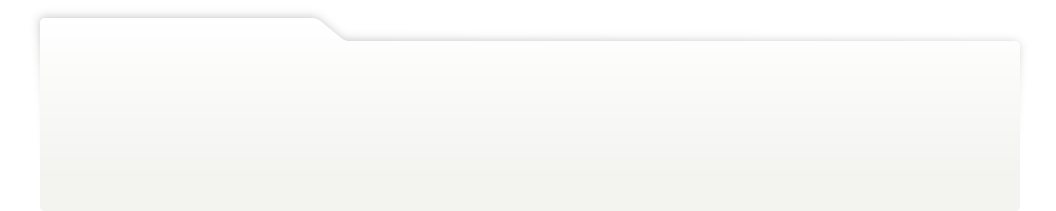
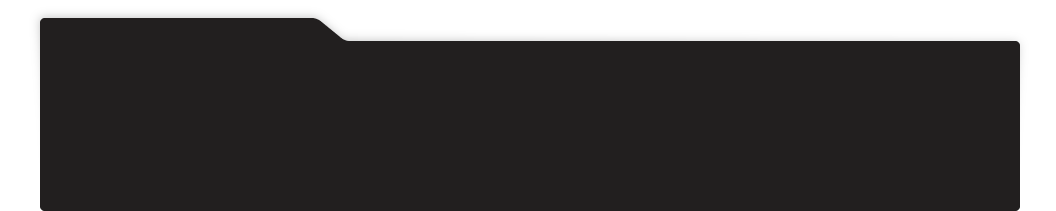
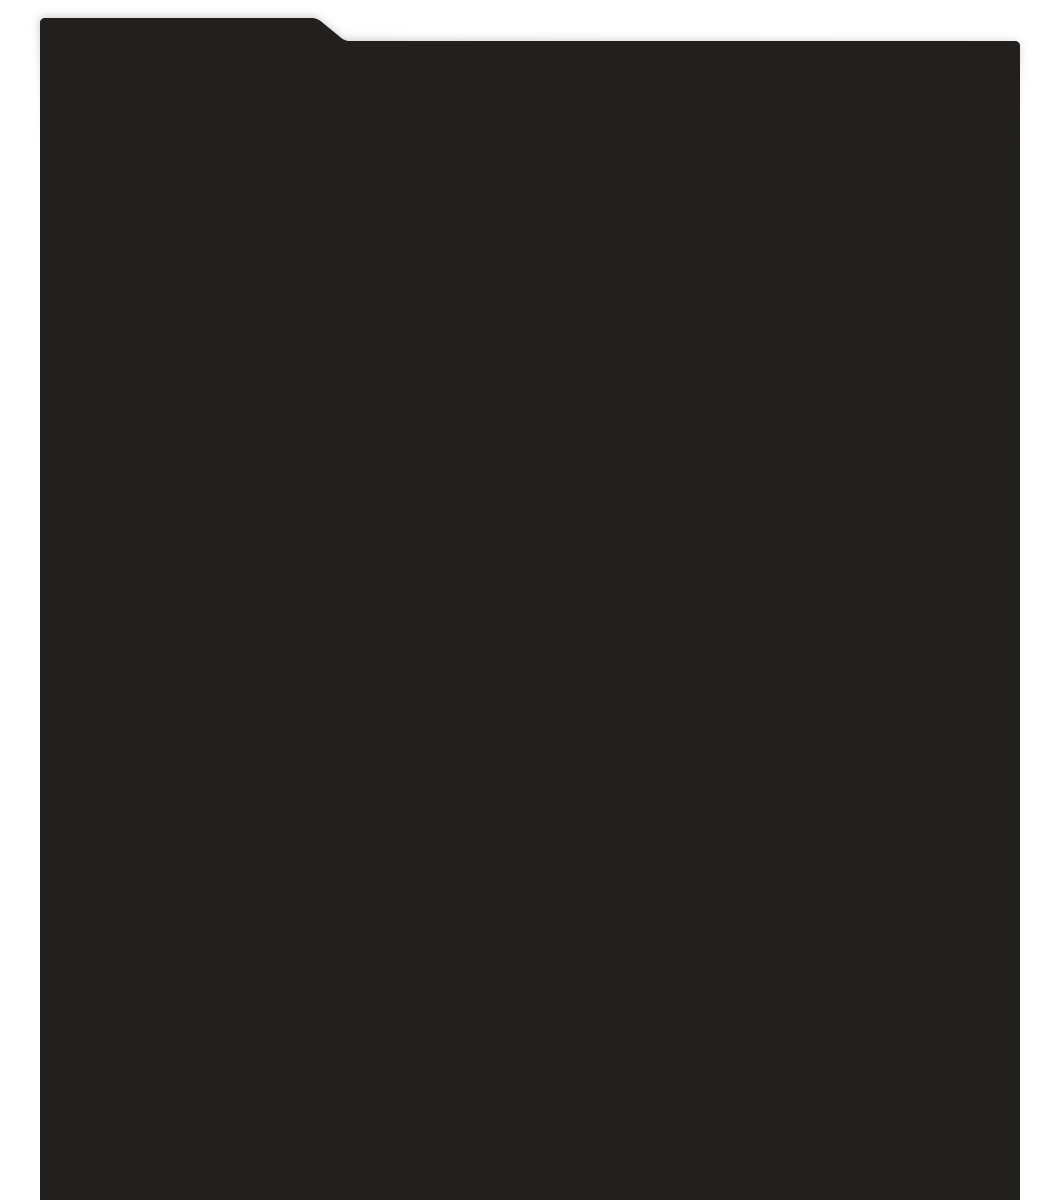
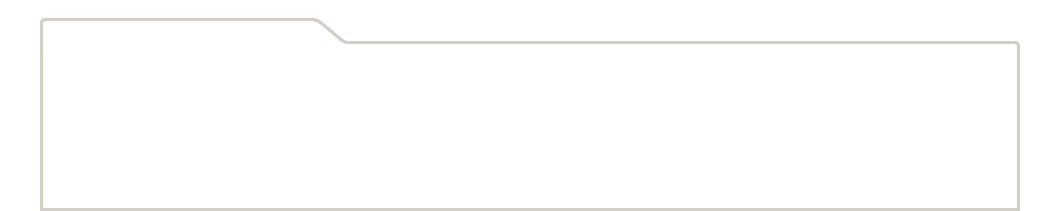
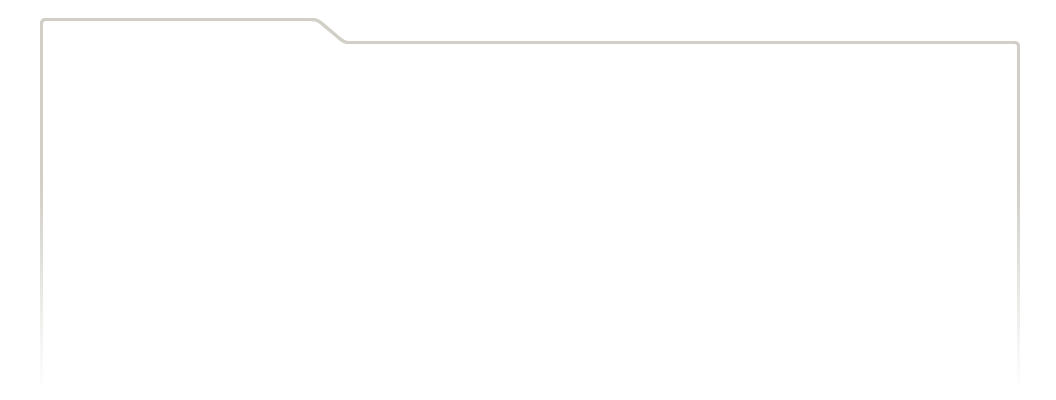
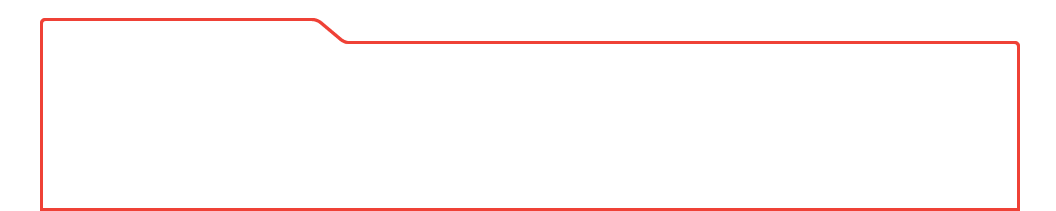
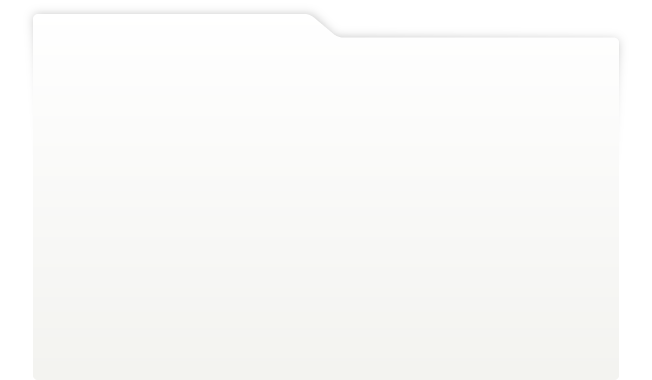
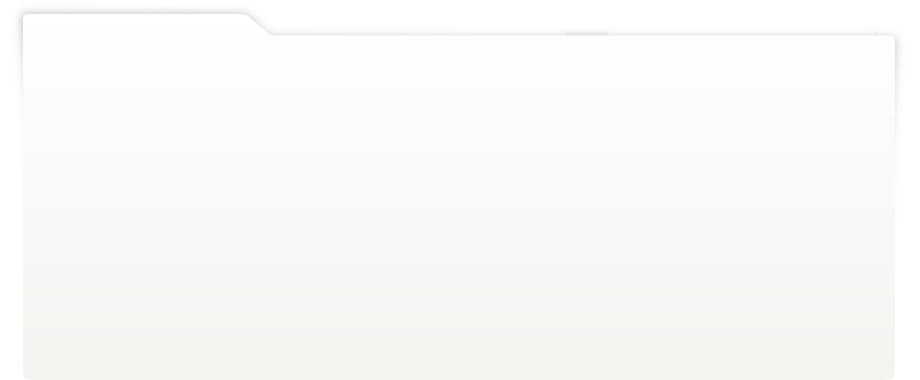
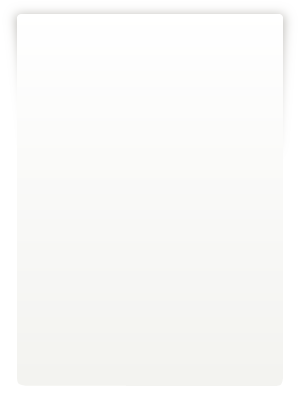
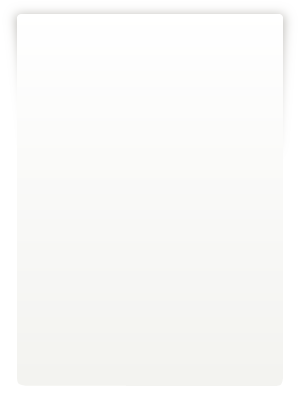
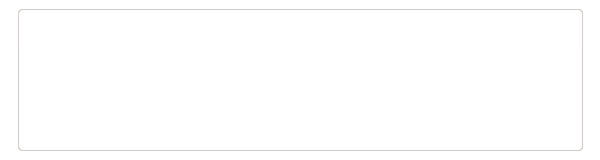
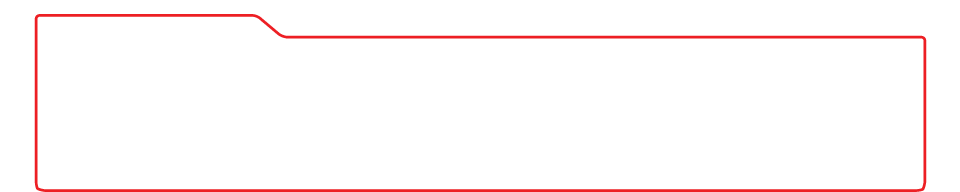
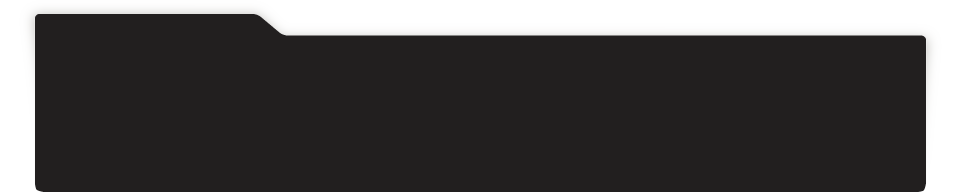
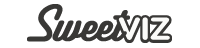
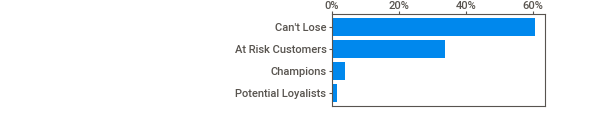
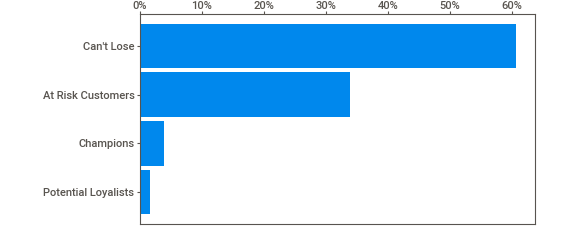
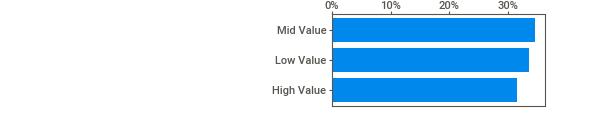
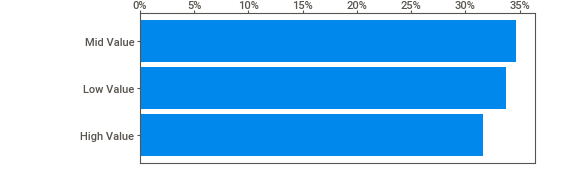
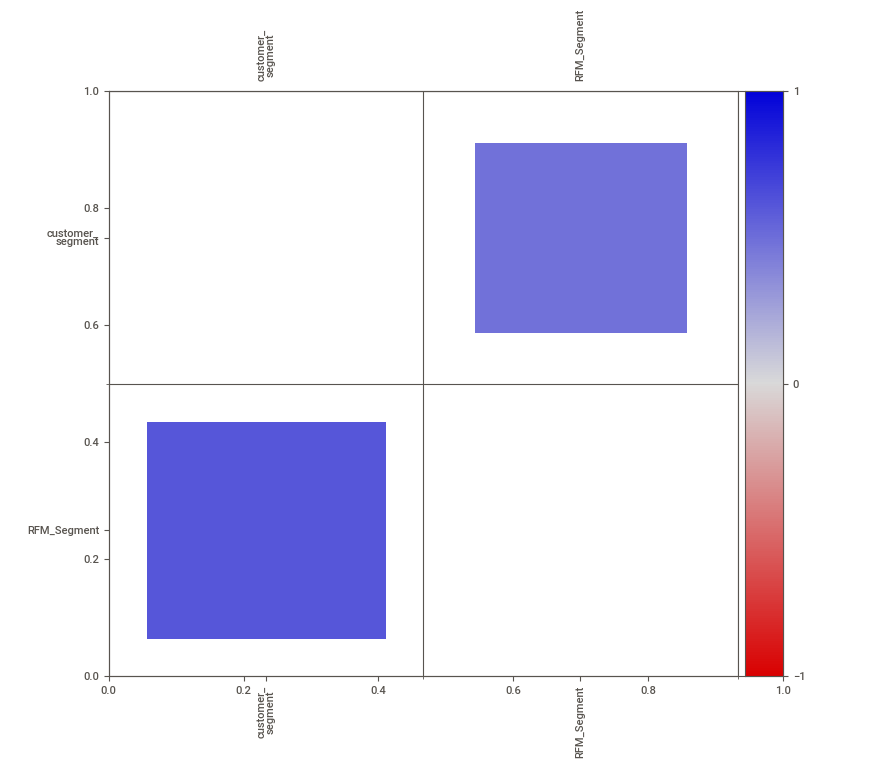
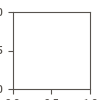

In [92]:
import sweetviz as sv

#specifying columns to visualize
viz_columns = ['customer_segment', 'RFM_Segment']

#creating a report using the sweetviz library
report = sv.analyze(rfm_df[viz_columns])
show_logo = 0

#saving the report as an html file
report.show_notebook()

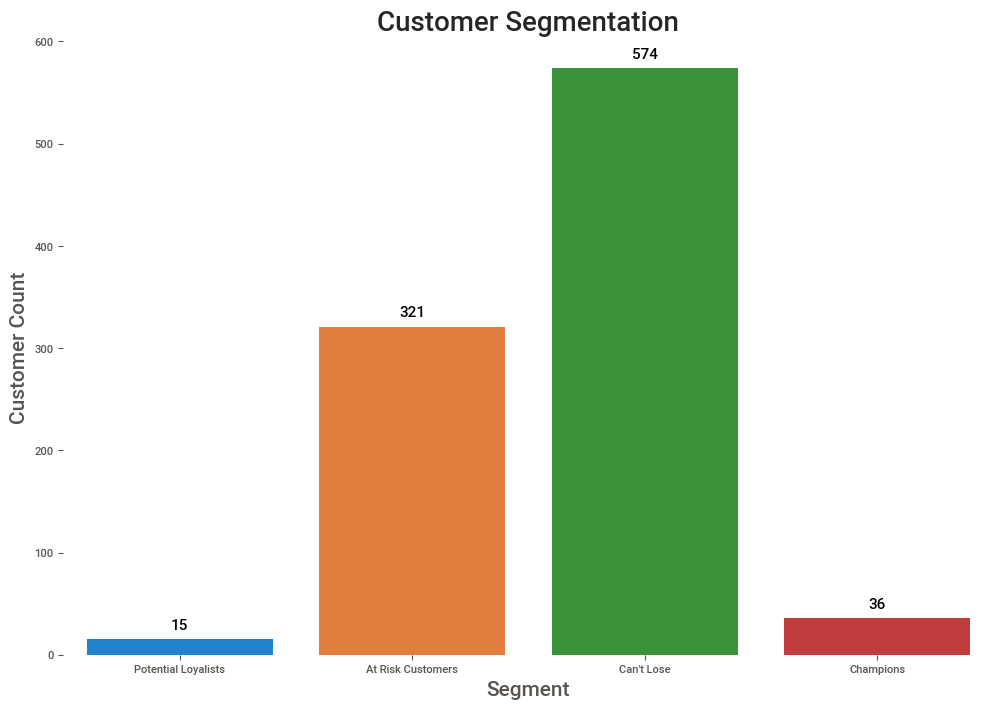

In [93]:
#visuaizing customer segment

#setting the figure size
plt.figure(figsize=(12,8))

#plotting the data
ax = sns.countplot(x='customer_segment',data=rfm_df)

#adding anottations
for bar in ax.patches:
    ax.annotate(int(bar.get_height()),
                xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                ha='center', va='center',
                xytext = (0, 10), fontsize=11, color='Black',
                textcoords = 'offset points')
#removing spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

sns.despine(left=True, bottom=True)
sns.set_style('white')
sns.set_context('notebook')

#setting the plot title
plt.title('Customer Segmentation', fontsize=20)

#setting x and y labels
ax.set_xlabel('Segment', fontsize=15)
ax.set_ylabel('Customer Count', fontsize=15)

#displaying the plot
plt.show()

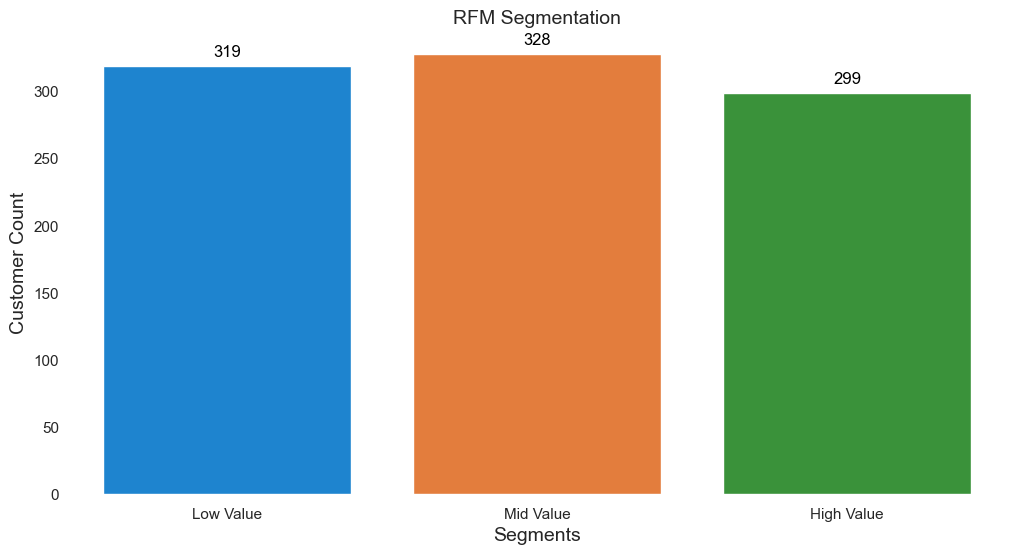

In [94]:
#visualizing RFM segment

#setting the figure size
plt.figure(figsize=(12,6))

#plotting the data
ax = sns.countplot(x='RFM_Segment',data=rfm_df)

#annotating the count plot
for bar in ax.patches:
    ax.annotate(int(bar.get_height()),
                xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                ha='center', va='center',
                xytext = (0, 10), fontsize=12, color='Black',
                textcoords='offset points')
    
#removing spines in the countplot
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

sns.set_style('whitegrid')
sns.set_context('notebook')

#adding title and labels
ax.set_title('RFM Segmentation',fontsize=14)
ax.set_xlabel('Segments',fontsize=14)
ax.set_ylabel('Customer Count',fontsize=14)

#displaying the plot
plt.show()

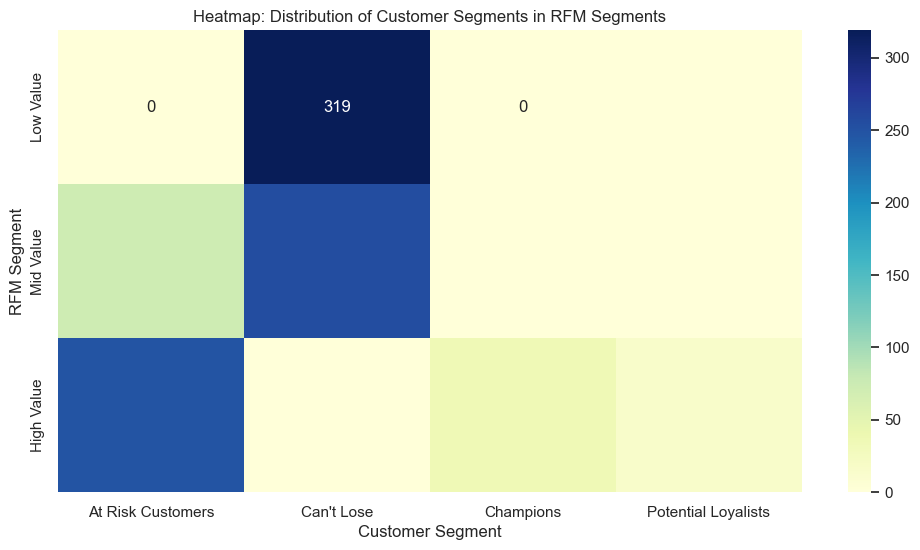

In [95]:

# Create a cross-tabulation (pivot table) of 'customer_segment' and 'RFM_Segment'
cross_tab = pd.crosstab(rfm_df['RFM_Segment'], rfm_df['customer_segment'])

# Create a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Heatmap: Distribution of Customer Segments in RFM Segments')
plt.xlabel('Customer Segment')
plt.ylabel('RFM Segment')

# Show the heatmap
plt.show()

In [96]:
import plotly.express as px

#calculating weights
weights = rfm_df['Frequency']
values = rfm_df['monetary']

#calculating the average
try:
    average = np.divide(np.sum(weights * values), np.sum(weights))
except ZeroDivisionError:
    average = np.nan

#plotting the treemap
treemap_data = rfm_df.copy()
treemap_data['Frequency'].fillna(0, inplace=True)
fig = px.treemap(
    treemap_data,
    path=['RFM_Segment', 'customer_segment'],
    values='RFM_Score',
    color='RFM_Score',
    color_continuous_scale='tropic',
    title='Distribution of Customer segments in RFM segments')

fig.show()



![](newplot.png)

In [97]:
#converting the recency column to string 
rfm_df['recency'] = rfm_df['recency'].astype('string')

In [98]:
#extracting only the number of days in the recency column
rfm_df['recency'] = rfm_df['recency'].str.split(' ').str[0]

In [99]:
rfm_df

,CustomerID,recency,Frequency,monetary,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score,RFM_Segment,customer_segment
0,1011,33,2,1129.02,47.33,97.30,97.20,8.97,High Value,Potential Loyalists
1,1025,21,1,359.29,64.73,47.41,47.36,5.00,Mid Value,At Risk Customers
2,1029,0,1,704.99,100.00,47.41,47.36,5.53,High Value,At Risk Customers
3,1046,43,1,859.82,27.91,47.41,47.36,4.45,Low Value,Can't Lose
4,1049,13,1,225.72,78.76,47.41,47.36,5.21,High Value,At Risk Customers
...,...,...,...,...,...,...,...,...,...,...
941,9941,42,1,960.53,29.72,47.41,47.36,4.47,Low Value,Can't Lose
942,9950,38,1,679.11,37.78,47.41,47.36,4.59,Mid Value,Can't Lose
943,9954,12,1,798.01,81.06,47.41,47.36,5.24,High Value,At Risk Customers
944,9985,57,1,36.10,5.50,47.41,47.36,4.11,Low Value,Can't Lose


In [100]:
#converting the recency column to numeric for plotting
rfm_df['recency'] = pd.to_numeric(rfm_df['recency'])

**Visualizing only Recency and Frequency due to monetary value being a large number**

Text(0.5, 1.0, 'Recency and Frequency Distribution for High Value Customers')

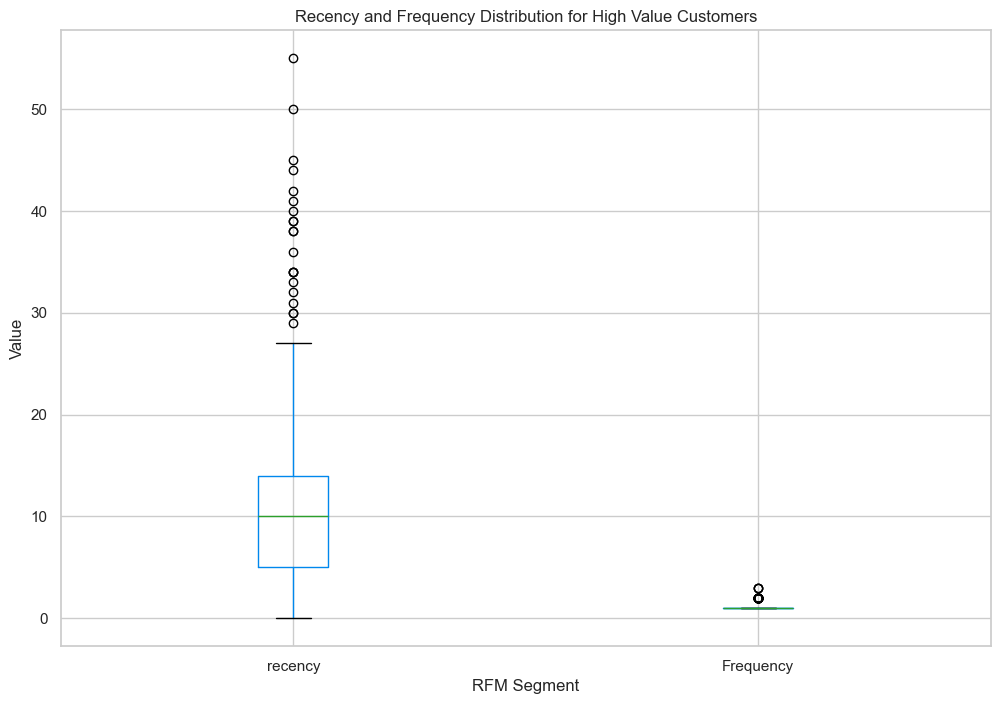

In [101]:
#visualizing rfm metrics for the high value customers

#defining the columns
cols = ['recency', 'Frequency']

#filtering the dataframe to include only the high value customers
high_value_df = rfm_df[rfm_df['RFM_Segment'] == 'High Value']

#creating a boxplot for the high value customers
plt.figure(figsize=(12,8))
high_value_df.boxplot(column=cols)
plt.xlabel('RFM Segment')
plt.ylabel('Value')
plt.title('Recency and Frequency Distribution for High Value Customers')

Text(0.5, 1.0, 'Recency and Frequency Distribution for Mid Value Customers')

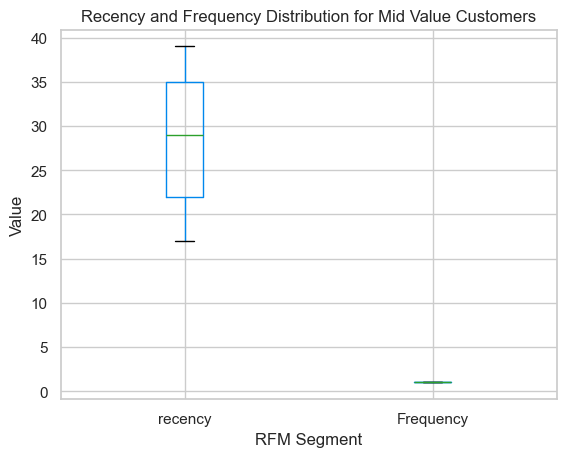

In [102]:
#visualizing rfm metrics for Mid Value customerts

#filtering the dataframe to include only customers with a mid value
import seaborn as sns
mid_value_df = rfm_df[rfm_df['RFM_Segment'] == "Mid Value"]

#plotting the distribution of recency, frequency, and monetary
mid_value_df.boxplot(column=cols)
plt.xlabel('RFM Segment')
plt.ylabel('Value')
plt.title('Recency and Frequency Distribution for Mid Value Customers')

Text(0.5, 1.0, 'Recency and Frequency Distribution for Low Value Customers')

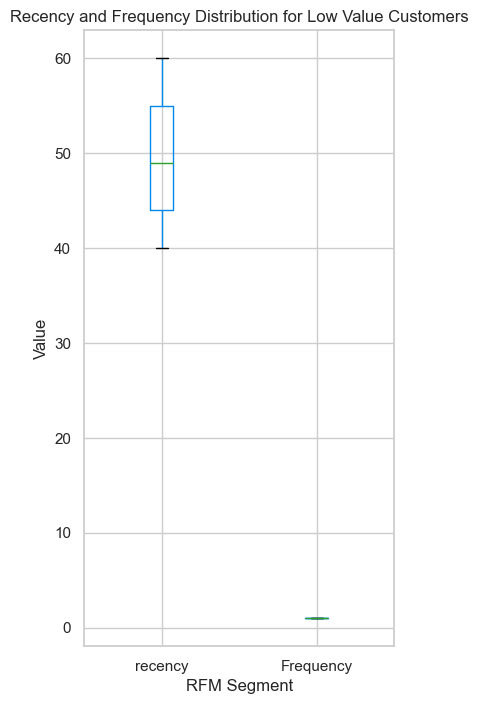

In [103]:
#visualizing metrics for low value customers
low_value_df = rfm_df[rfm_df['RFM_Segment'] == "Low Value"]

plt.figure(figsize=(4,8))
low_value_df.boxplot(column=cols)
plt.xlabel('RFM Segment')
plt.ylabel('Value')
plt.title('Recency and Frequency Distribution for Low Value Customers')

**Visualizing monetary value for all the RFM Segments**

Text(0.5, 1.0, 'Monetary Value by RFM Segment')

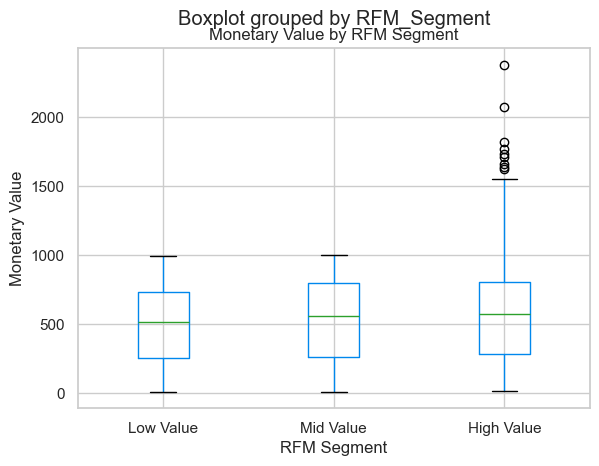

In [104]:
rfm_df.boxplot(column="monetary", by="RFM_Segment")
plt.xlabel('RFM Segment')
plt.ylabel('Monetary Value')
plt.title('Monetary Value by RFM Segment')

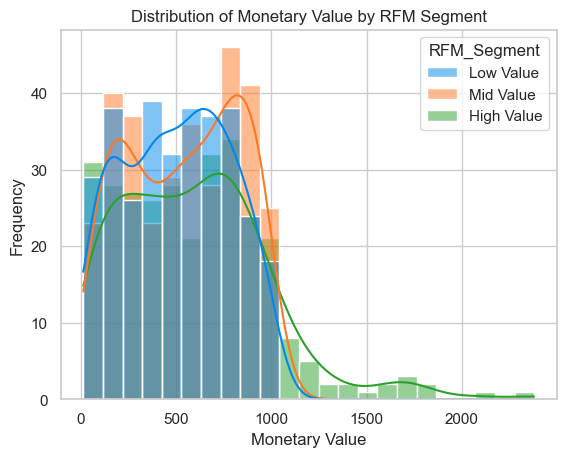

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a histplot of Monetary values by RFM_Segment
sns.histplot(data=rfm_df, x="monetary", hue="RFM_Segment", kde=True)
plt.xlabel('Monetary Value')
plt.ylabel('Frequency')
plt.title('Distribution of Monetary Value by RFM Segment')

# Display the plot
plt.show()


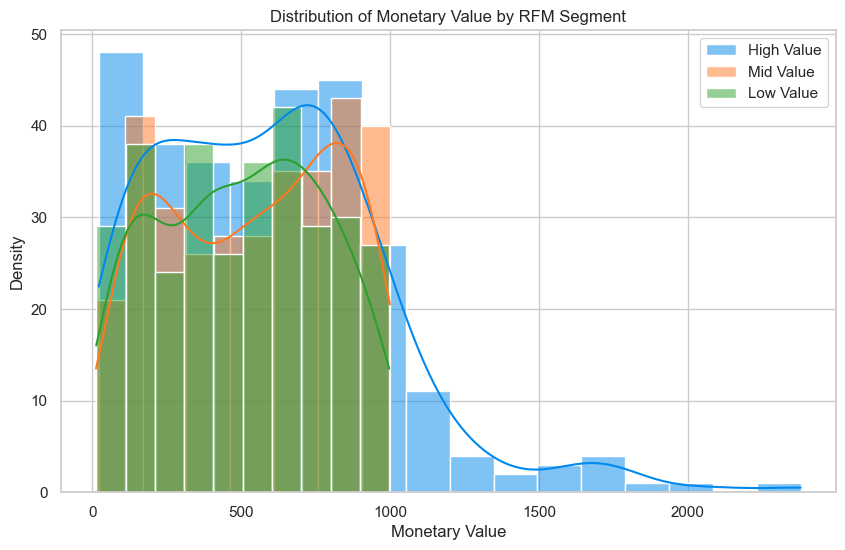

In [106]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a distplot of Monetary values by RFM_Segment
plt.figure(figsize=(10, 6))
for segment in rfm_df['RFM_Segment'].unique():
    sns.histplot(rfm_df[rfm_df['RFM_Segment'] == segment]['monetary'], label=segment, kde=True)

plt.xlabel('Monetary Value')
plt.ylabel('Density')
plt.title('Distribution of Monetary Value by RFM Segment')
plt.legend()

# Display the plot
plt.show()


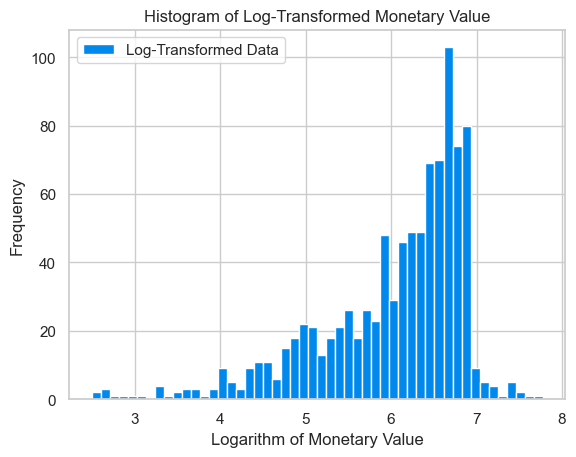

In [107]:
import numpy as np
import matplotlib.pyplot as plt

# Apply log transformation to the "monetary" column
rfm_df['log_monetary'] = np.log(rfm_df['monetary'])

# Create a histogram of the log-transformed data
plt.hist(rfm_df['log_monetary'], bins=50, label='Log-Transformed Data')
plt.xlabel('Logarithm of Monetary Value')
plt.ylabel('Frequency')
plt.legend()
plt.title('Histogram of Log-Transformed Monetary Value')

# Display the plot
plt.show()

